<a href="https://colab.research.google.com/github/yejikwon7/AI/blob/main/GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello")

hello


html 적용 가능

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import torch # 외부 라이브러리
print(torch.__version__)

2.4.1+cu121


파이토치에서의 경사하강법_단순한 기울기 계산

In [ ]:
# 먼저 파이토치 불러오기
import torch

In [ ]:
# x를 [2.0, 3.0]의 값을 가진 텐서로 초기화 해주고 기울기 계산을 True로 켜 놓음
# z = 2x^2+3 : 수식 수행

x = torch.tensor(data=[2.0, 3.0], requires_grad=True) # tensor 형태로 데이터 받아옴
# data: 데이터 특징 2개, 하나의 데이터가 입력으로 들어감
# requires_grad: gradient 계산 가능

y = x ** 2
z = 2 * y + 3

In [ ]:
# 목표값 지정
target = torch.tensor([3.0, 4.0])

# z와 목표값의 절댓값 차이 계산
# backward는 스칼라 값에 대해 동작하기 때문에 길이 2짜리 텐서인 loss를 torch.sum을 통해 하나의 숫자로 바꿈
loss = torch.sum(torch.abs(z - target)) # 모든 특성들에서 계산된 오차 더해 하나의 값으로 내보냄

# 스칼라 값이 된 loss에 대해 backward를 적용
# loss 계산해야 기울기 계산 가능함
loss.backward() # 스칼라 하나여야 함, 특성 여러 개이면 안 됨

# y, z는 기울기가 None으로 나옴 -> x만이 leaf node이기 때문
print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


<ipython-input-7-ba3a725906c4>:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(x.grad, y.grad, z.grad)


선형회귀분석 모델 만들기

In [ ]:
#필요한 라이브러리 호출

# 넘파이와 파이토치 불러옴
import numpy as np # 행렬 연산 원활하게 하기 위함
import torch

# Neural Network의 약자로 인공신경망 연산들이 들어가 있음(ex. Linear, Convolution, RNN 등)
import torch.nn as nn

# 모델을 최적화 하는데 필요한 최적화 함수들이 들어가 있음(ex. SGD, ADAM, LBFGS 등)
import torch.optim as optim

# 텐서를 초기화하는 함수들 들어가 있음(ex. uniform, normal, xavier 등): weight값을 어느 위치에 만들어낼지 지정
import torch.nn.init as init

# 데이터나 학습 결과 출력하기 위해 사용
import matplotlib.pyplot as plt

In [ ]:
# 데이터 생성

# 데이터 개수는 1000개, 학습 횟수는 500회로 지정
num_data = 1000
num_epoch = 500 # 반복: x-> 예측값y -> loss -> 역전파

# 데이터에 추가할 노이즈를 정규분포를 따르게 만듦
# 이때 평균은 디폴트로 0, 편차는 0.2로 임의 지정
noise = init.normal_(torch.FloatTensor(num_data, 1), std = 0.2)
# std: 표준편차 높을수록 넓은 범위로 데이터 분포함

# x는 -10에서 10 사이로 uniform하게 생성
# x는 1000*1의 형태로 -10에서 10 사이의 값들을 uniform하게 갖게 됨
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)

# 연산 그래프 정의
y = 2*x + 3 # 대칭되는 정답값 만듦

# y에 노이즈 더해 y_noise 만듦
# 학습 때 y_noise를 목표값으로 사용
y_noise = y + noise

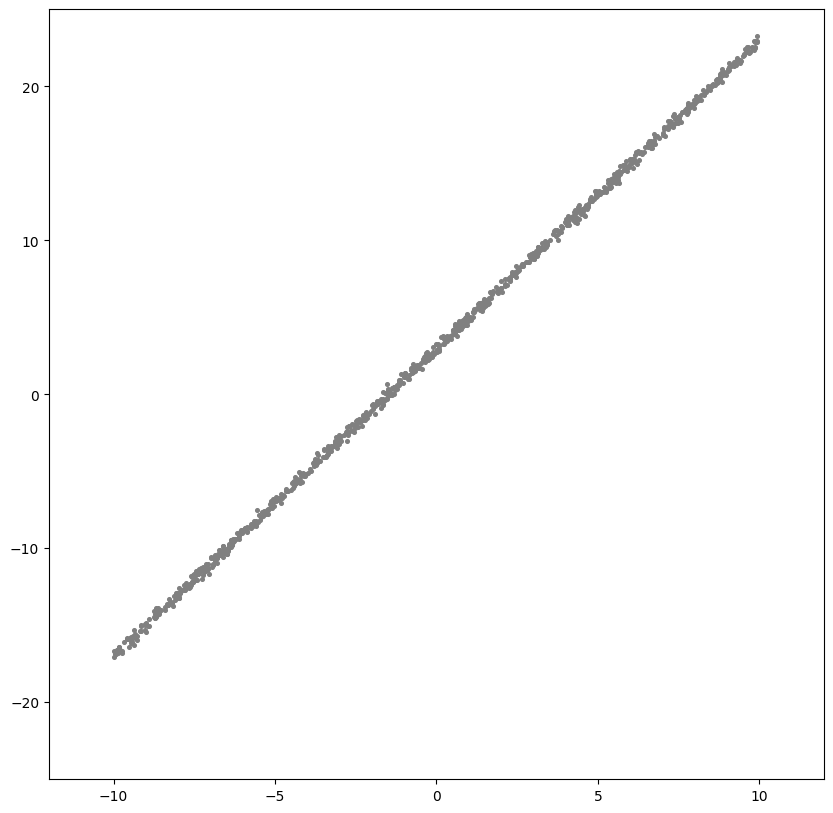

In [ ]:
# 데이터 시각화

# matplotlib의 scatter 함수 사용해 학습 데이터 확인
# figure의 크기 지정
plt.figure(figsize=(10, 10))
plt.scatter(x.numpy(), y_noise.numpy(), s=7, c="gray")

# figure의 x, y 축 범위 지정
plt.axis([-12, 12, -25, 25])

# figure 출력
plt.show()

In [ ]:
# 모델, 손실함수, 최적화 함수 설정

# 선형 모델 생성
model = nn.Linear(1, 1)

# 손실 함수 지정
loss_func = nn.L1Loss()

# 최적화 함수 지정
optimizer = optim.SGD(model.parameters(), lr = 0.01)
# model.parameters(): 모델의 변수, 선언한 모델에 대한 파라미터를 최적화

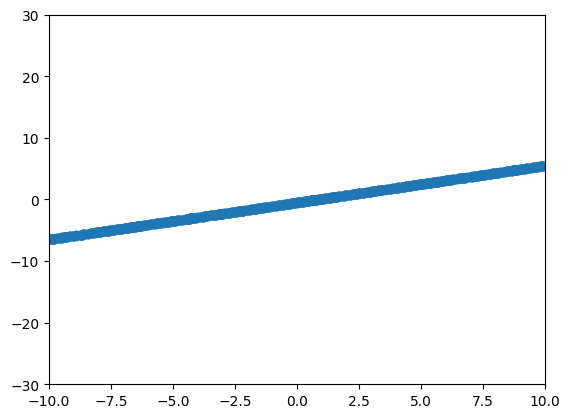

tensor(7.2979)


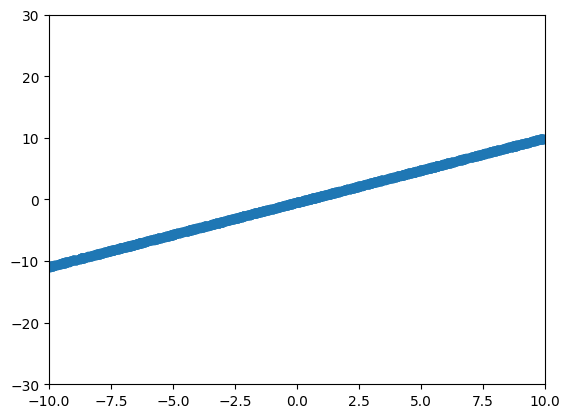

tensor(5.3111)


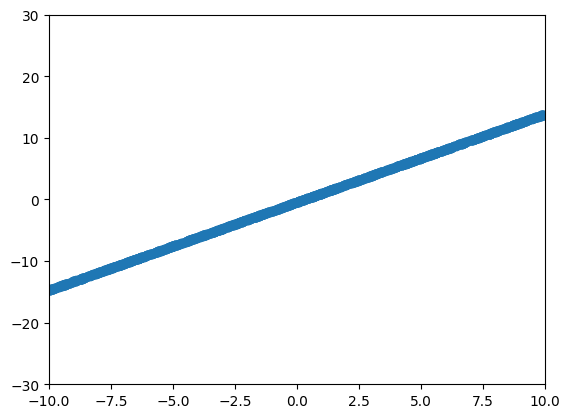

tensor(3.8181)


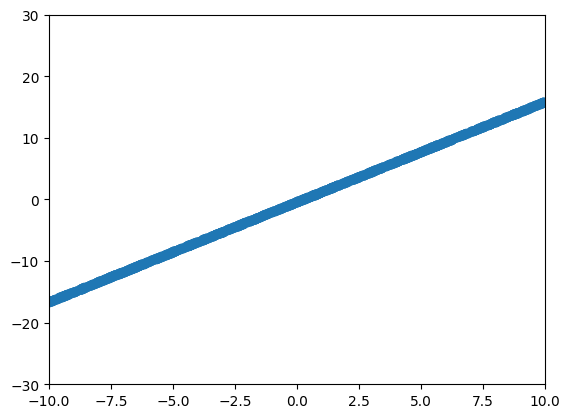

tensor(3.3490)


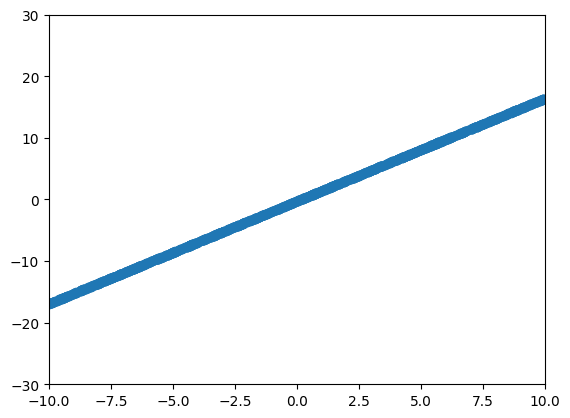

tensor(3.2393)


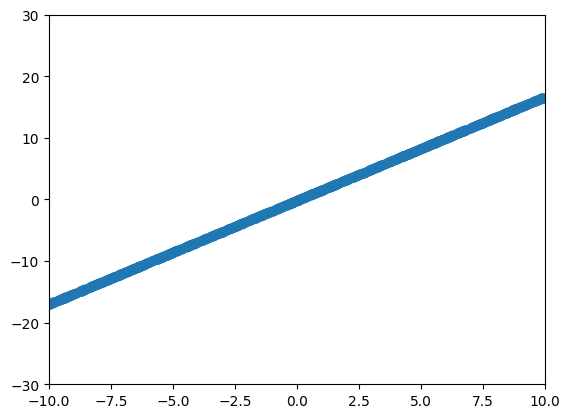

tensor(3.1416)


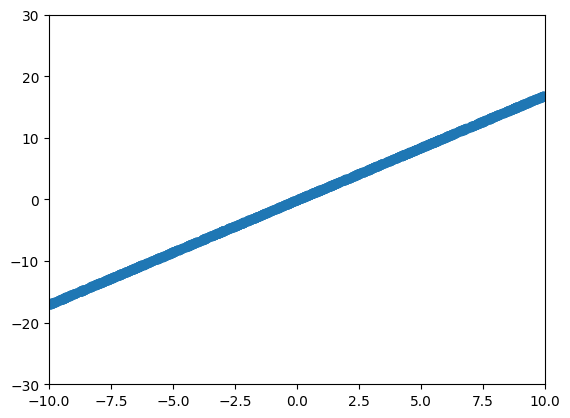

tensor(3.0442)


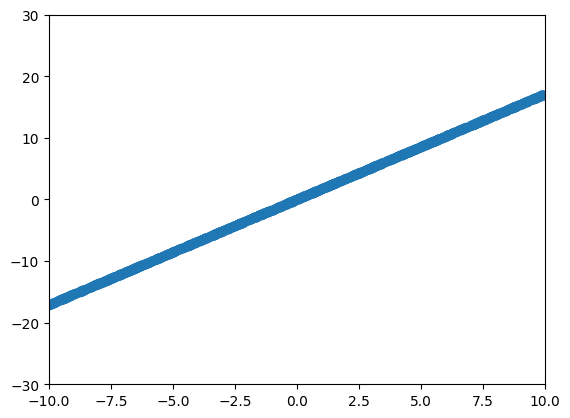

tensor(2.9468)


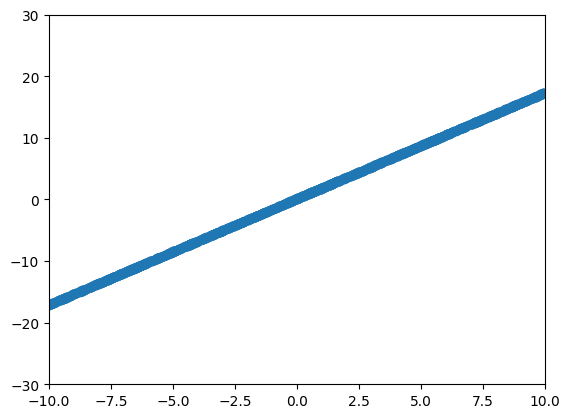

tensor(2.8495)


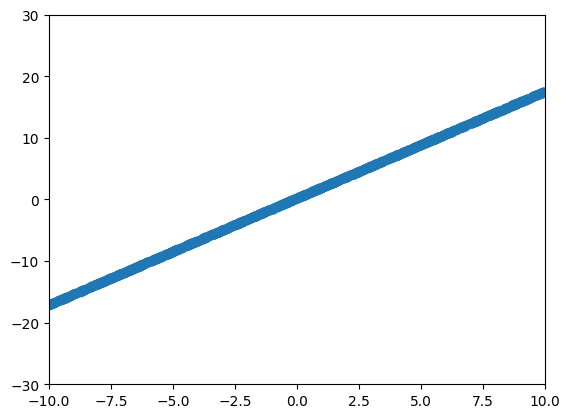

tensor(2.7522)


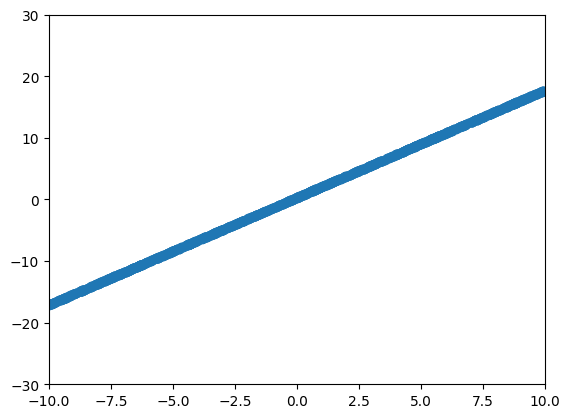

tensor(2.6549)


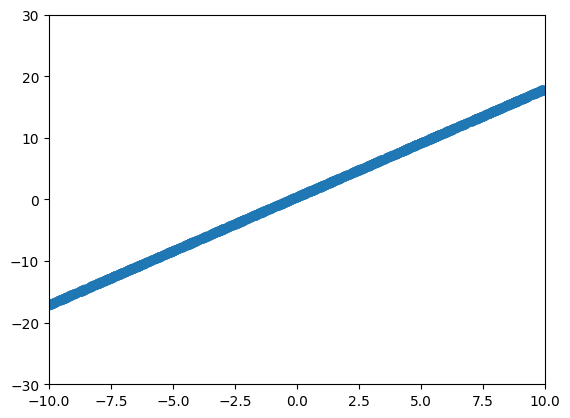

tensor(2.5576)


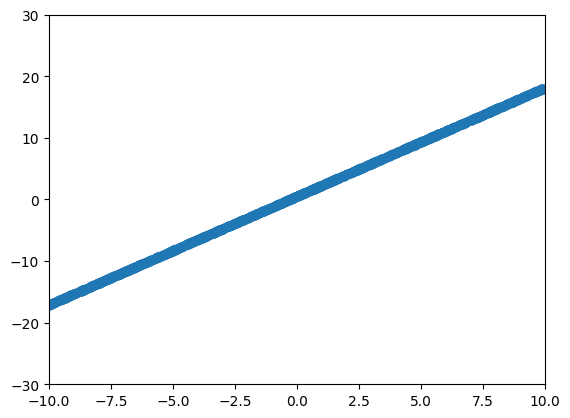

tensor(2.4603)


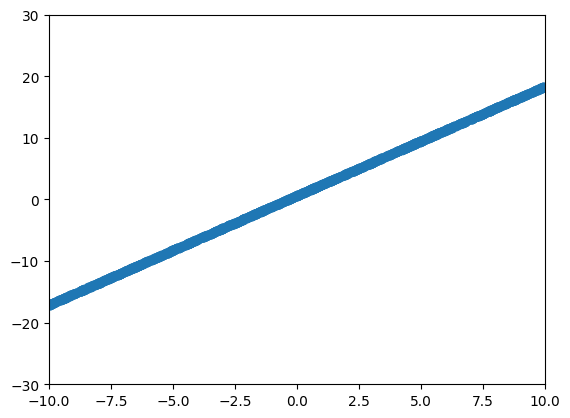

tensor(2.3630)


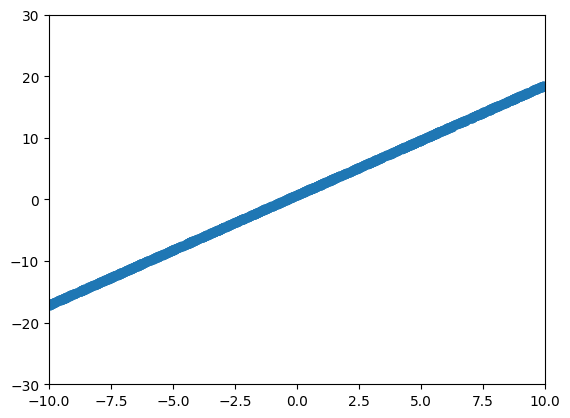

tensor(2.2658)


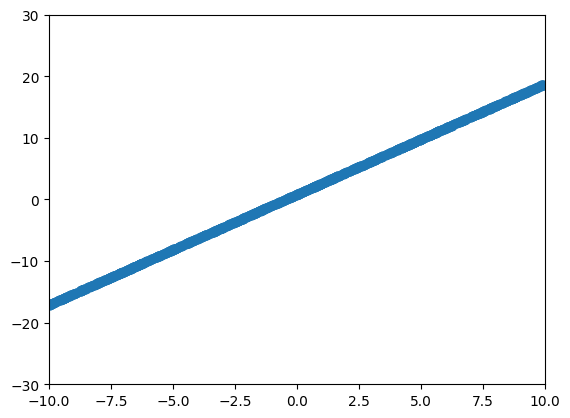

tensor(2.1685)


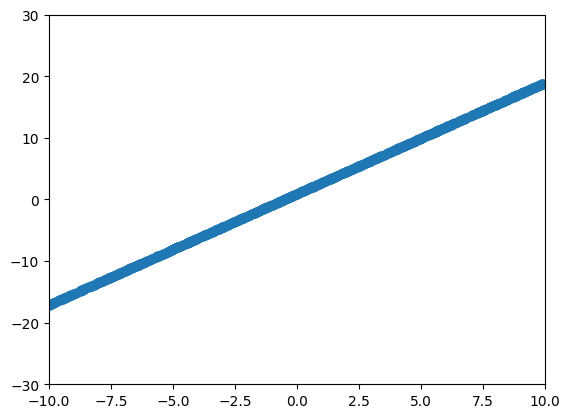

tensor(2.0712)


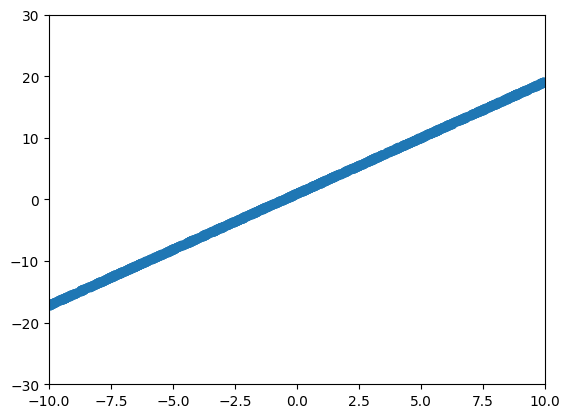

tensor(1.9739)


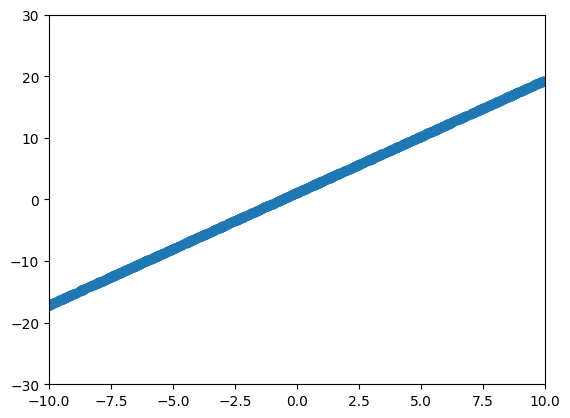

tensor(1.8767)


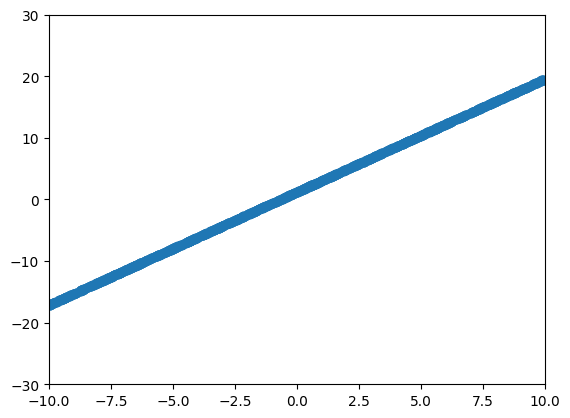

tensor(1.7794)


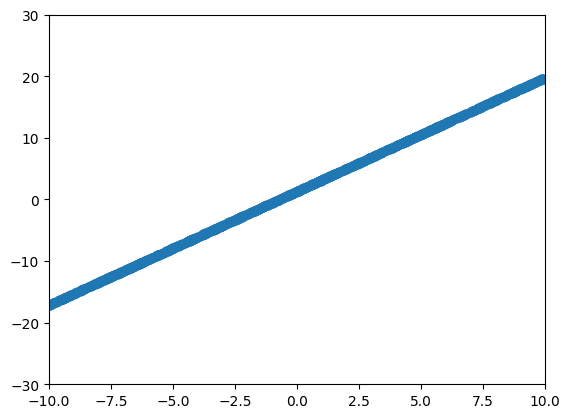

tensor(1.6822)


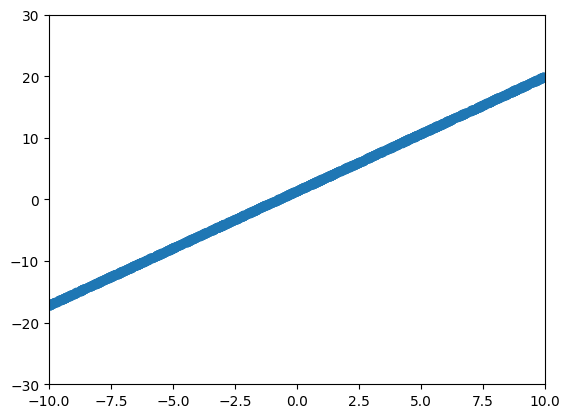

tensor(1.5850)


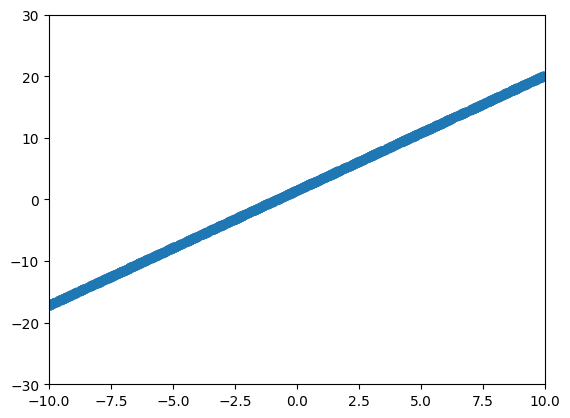

tensor(1.4878)


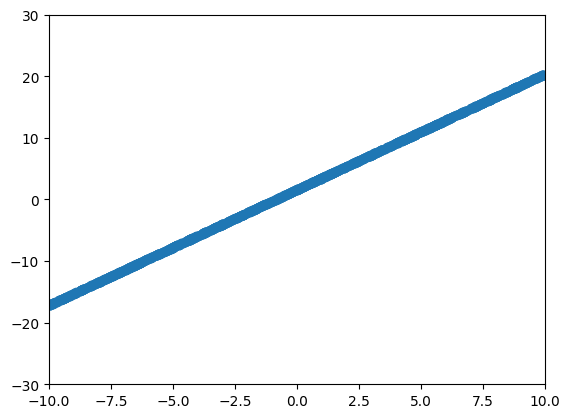

tensor(1.3906)


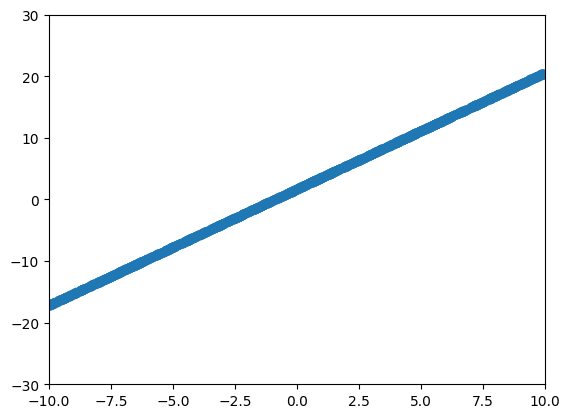

tensor(1.2936)


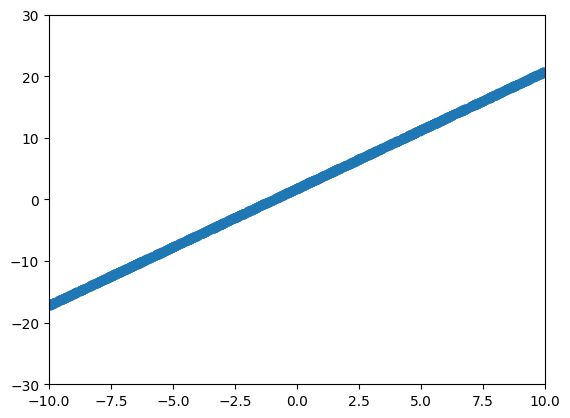

tensor(1.1965)


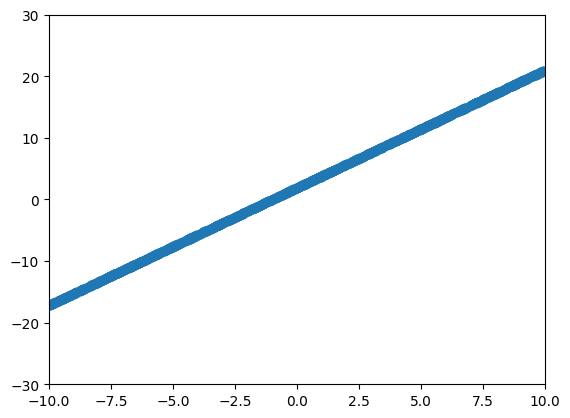

tensor(1.0995)


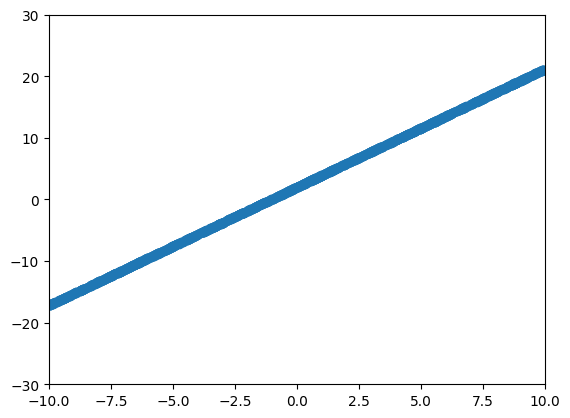

tensor(1.0025)


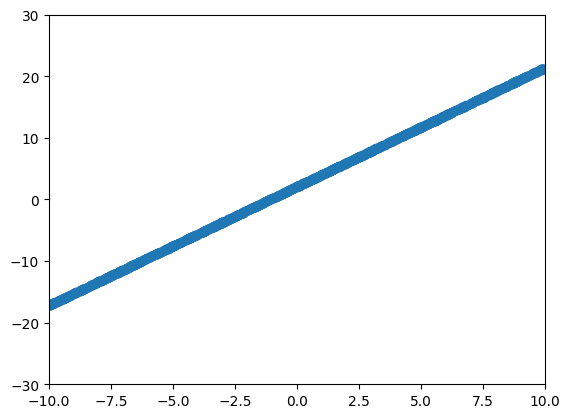

tensor(0.9055)


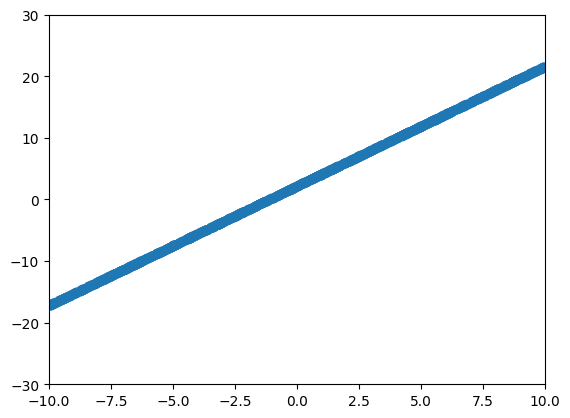

tensor(0.8086)


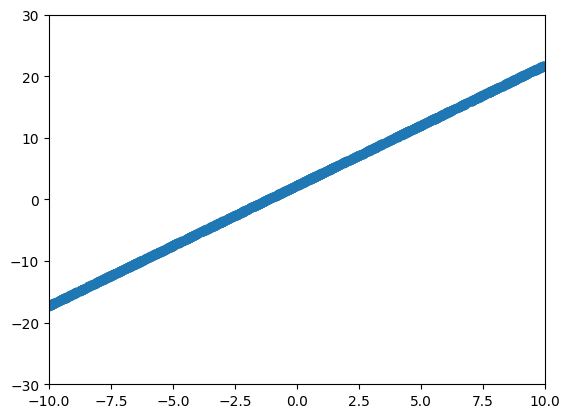

tensor(0.7118)


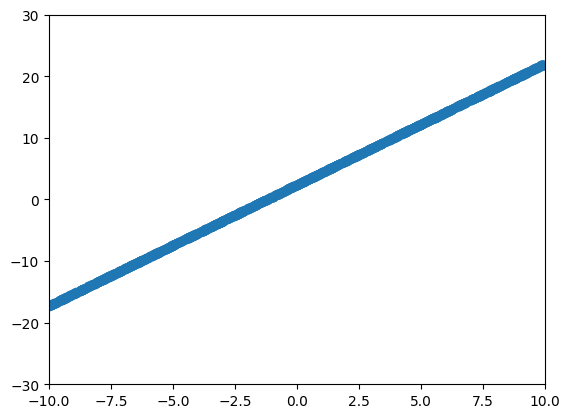

tensor(0.6150)


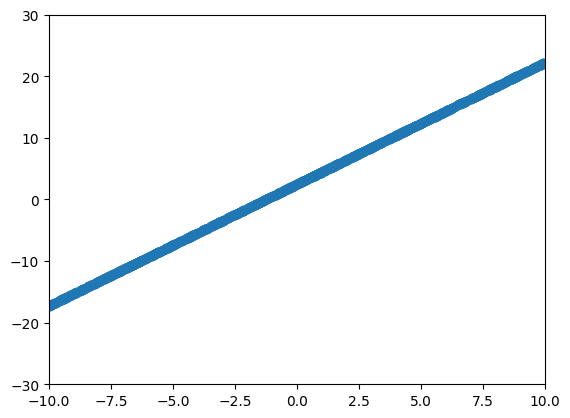

tensor(0.5187)


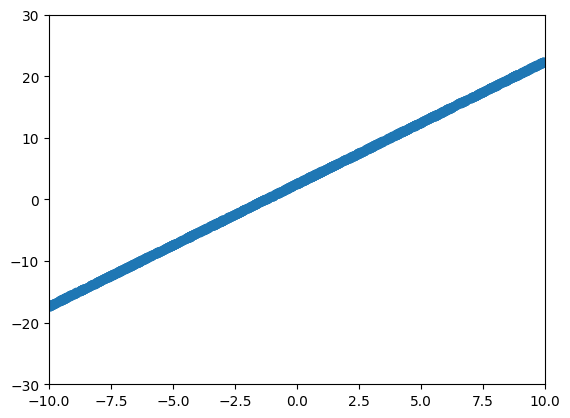

tensor(0.4258)


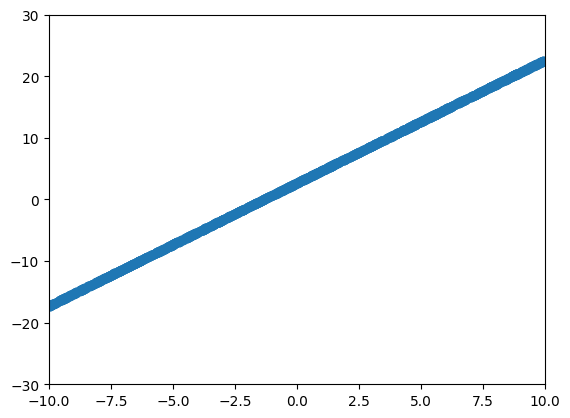

tensor(0.3389)


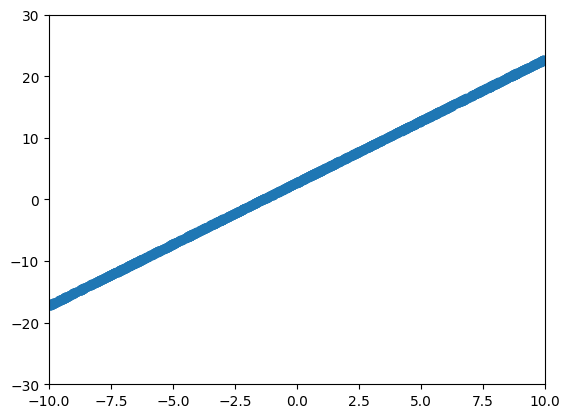

tensor(0.2667)


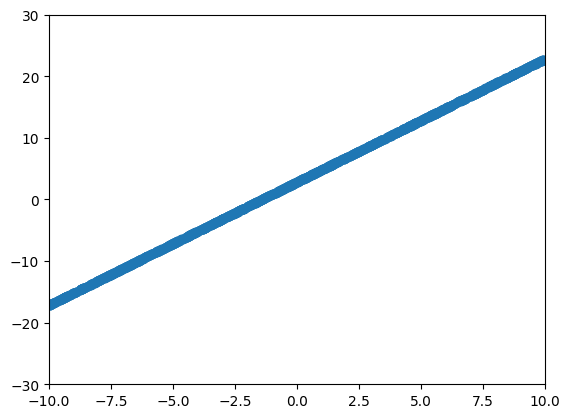

tensor(0.2175)


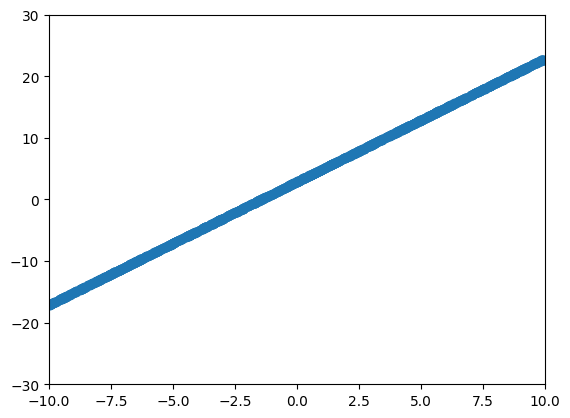

tensor(0.1896)


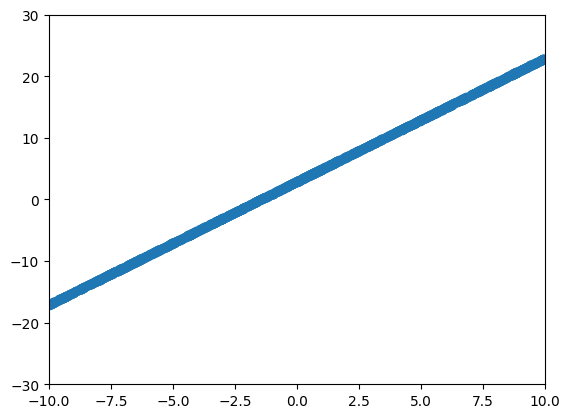

tensor(0.1751)


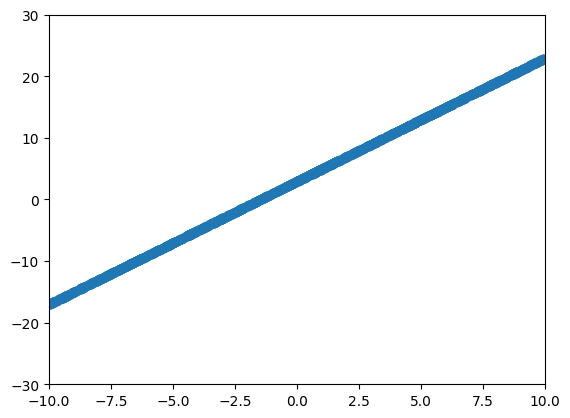

tensor(0.1683)


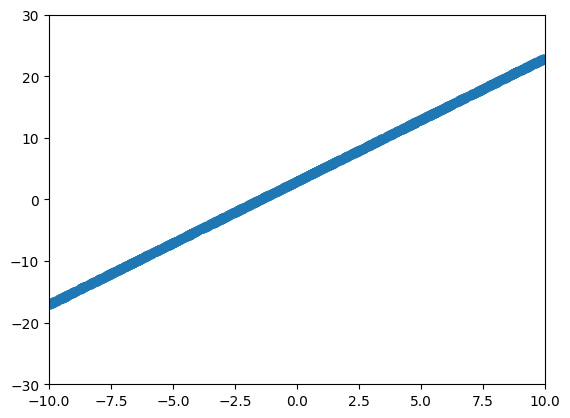

tensor(0.1657)


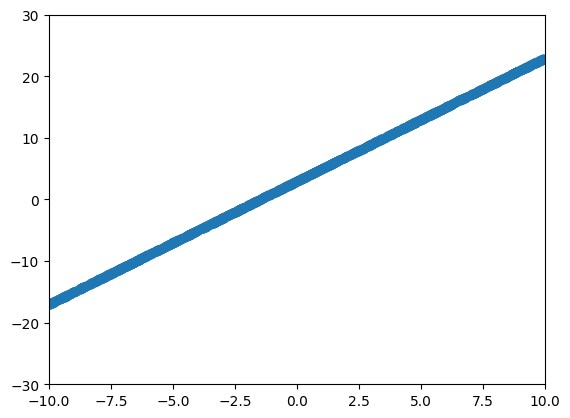

tensor(0.1646)


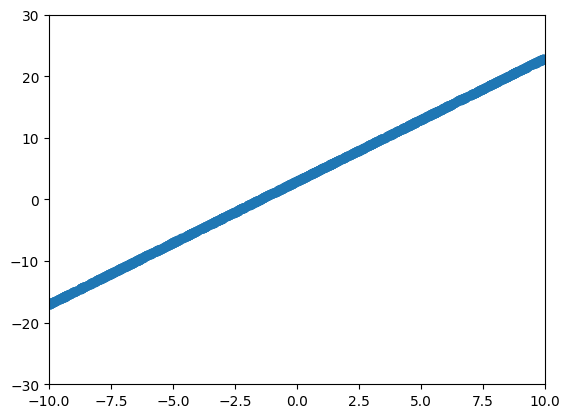

tensor(0.1640)


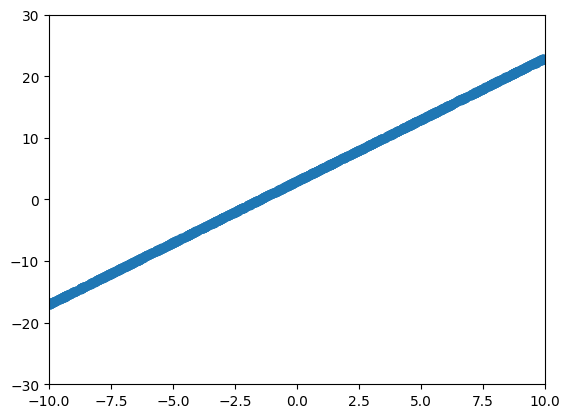

tensor(0.1637)


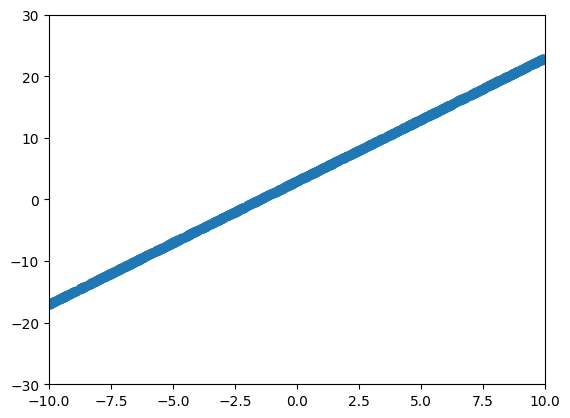

tensor(0.1635)


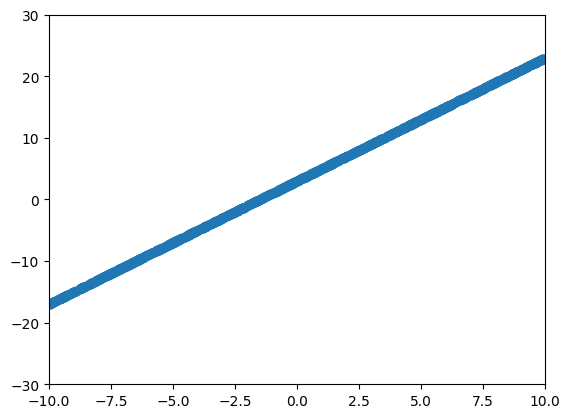

tensor(0.1634)


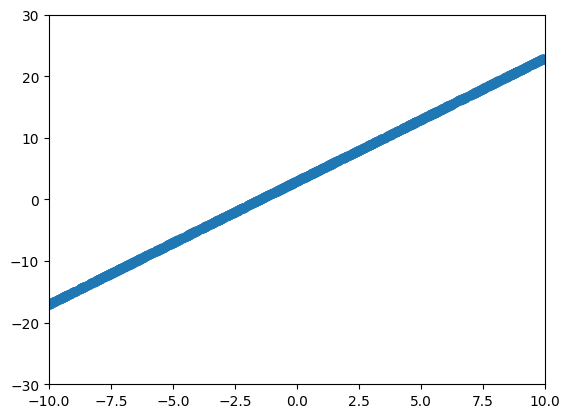

tensor(0.1634)


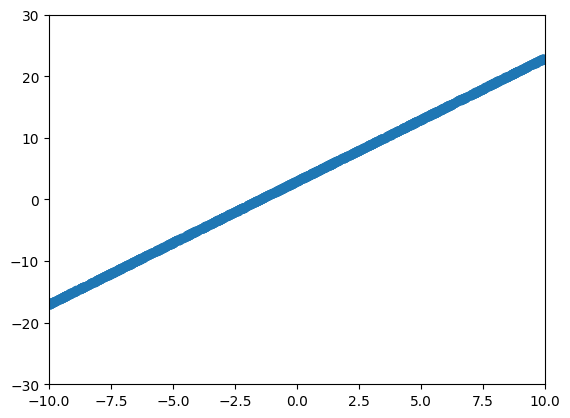

tensor(0.1633)


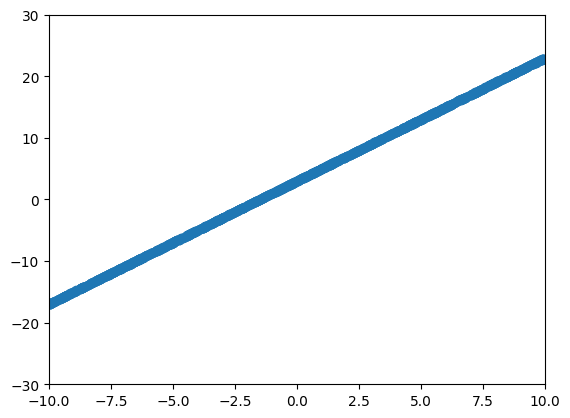

tensor(0.1633)


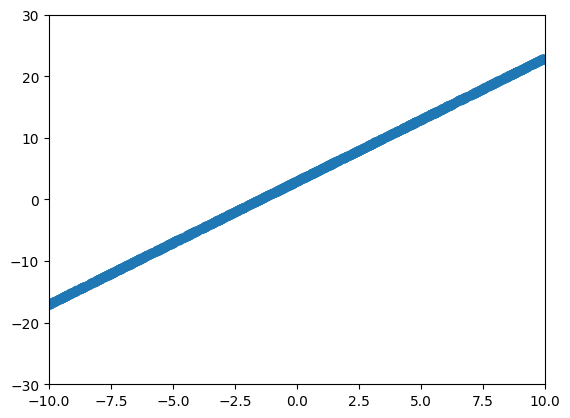

tensor(0.1633)


In [ ]:
# 모델 학습 및 중간 확인

# 손실이 어떻게 변하는지 확인
loss_arr = []

# 목표값 지정
label = y_noise
for i in range(num_epoch):
  # 이전 학습의 기울기 지우고 최적화 함수 초기화
  # 기울기 지우지 않으면 기존의 업데이트 때문에 학습 잘 되지 않음
  optimizer.zero_grad()

  # 입력값 x를 모델에 넣어 결과값 얻음
  output = model(x) # 학습 수행

  # 결과값과 목표값의 차이를 손실 함수로 구함
  loss = loss_func(output, label)

  # 손실에 대한 기울기
  loss.backward()

  # 구한 기울기를 이용해 모델 변수 업데이트
  optimizer.step() # SGD 통해 w, b 갱신

  # 10번 마다 모델의 변수가 어떻게 변하는지 출력
  if i % 10 == 0:
    # 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리하고, 텐서를 넘파이 배열로 바꿔 plt.scatter에 전달
    plt.scatter(x.detach().numpy(), output.detach().numpy())
    plt.axis([-10, 10, -30, 30])
    plt.show()
    print(loss.data)

  # 손실 추가
  loss_arr.append(loss.detach().numpy()) # loss 값이 epoch에 따라 어떻게 변하는지 확인

In [ ]:
# 학습 후 데이터와 모델 결과값 확인

plt.figure(figsize=(15, 15))
plt.scatter(x.numpy(), y_noise.numpy(), s=5, c="gray") # 실제 데이터
plt.scatter(x.detach().numpy(), output.detach().numpy(), s=5, c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


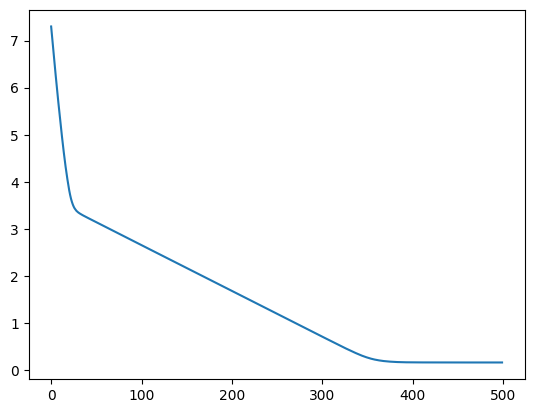

In [ ]:
# 손실 그래프: 반드시 확인 필요

# matplotlib의 plot 함수 이용해 손실이 어떻게 줄어가는지 확인
plt.plot(loss_arr) # epoch 반복마다 loss 값 어떻게 변하는지
plt.show()

In [ ]:
# 학습 후 모델 변수 값 확인

# 현재 모델은 weight와 bias를 변수로 가지고 있는데 그 값들이 학습 후 실제 몇인지 수치적으로 확인
param_list = list(model.parameters())
print("Weight:", param_list[0].item(), "\nBias: ", param_list[1].item())

Weight: 1.9990861415863037 
Bias:  3.0054571628570557
